In [3]:
from sklearn import svm
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump

def svm_model_grid(dataSet, testSet):
    
    img_train, img_test, label_train, label_test = dataSet.data, testSet.data, dataSet.target, testSet.target
    
    #grid search
    param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,  1.0,  2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0,
                       10, 13, 14, 15], 
            'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0],
            'kernel': ['rbf']}
    grid = GridSearchCV(svm.SVC(), param_grid,scoring='average_precision',
              refit=True, verbose=3,
              return_train_score=True)
    grid.fit(img_train, label_train)
    print(grid.best_params_)
    print(grid.best_estimator_)

    
    # classification_report outputs classification metrics
    # such as precision, recall and F1 score
    # pred_result = classifier.predict(img_train)
    pred_result = grid.predict(img_train)
    print('Classification Training Report: \n', classification_report(label_train, pred_result))
    
    # confusion_matrix outputs how many samples are correctly or incorrectly classified
    print('Train Confusion Matrix: \n', confusion_matrix(label_train, pred_result), "\n")

    # accuracy computes classification accuracy
    print('Train Accuracy: ', accuracy_score(label_train, pred_result))
    print('\n')
    
    # testing with validate data
    # validate_result = classifier.predict(img_test)
    validate_result = grid.predict(img_test)
    print('Classification Testing Report: \n', classification_report(label_test, validate_result))
    # `confusion_matrix` outputs how many samples are correctly or incorrectly classified
    print('Test Confusion Matrix: \n', confusion_matrix(label_test, validate_result), "\n")
    # `accuracy` computes classification accuracy
    print('Test Accuracy: ', accuracy_score(label_test, validate_result))
    
def svm_model(dataSet, testSet, svm_kernel_type, C, gamma):
    # img_train, img_test, label_train, label_test = train_test_split(dataSet.data, dataSet.target,test_size=testData_persentage,random_state=0)
    classifier = svm.SVC(kernel = svm_kernel_type, C = C, gamma = gamma)
    
    img_train, img_test, label_train, label_test = dataSet.data, testSet.data, dataSet.target, testSet.target
    
    #fitting classifier model
    classifier.fit(img_train, label_train)

    
    # classification_report outputs classification metrics
    # such as precision, recall and F1 score
    # pred_result = classifier.predict(img_train)
    pred_result = classifier.predict(img_train)
    print('Classification Training Report: \n', classification_report(label_train, pred_result))
    
    # confusion_matrix outputs how many samples are correctly or incorrectly classified
    print('Train Confusion Matrix: \n', confusion_matrix(label_train, pred_result), "\n")

    # accuracy computes classification accuracy
    print('Train Accuracy: ', accuracy_score(label_train, pred_result))
    print('\n')
    
    # testing with validate data
    # validate_result = classifier.predict(img_test)
    validate_result = classifier.predict(img_test)
    print('Classification Testing Report: \n', classification_report(label_test, validate_result))
    # `confusion_matrix` outputs how many samples are correctly or incorrectly classified
    print('Test Confusion Matrix: \n', confusion_matrix(label_test, validate_result), "\n")
    # `accuracy` computes classification accuracy
    print('Test Accuracy: ', accuracy_score(label_test, validate_result))
    
    #export model
    dump(classifier, 'svm_model_1n2dataset.joblib')

    # plot_images_labels_wrong_prediction(img_test, label_test, validate_result, idx = 0, num=10)
    

In [4]:
def plot_images_labels_wrong_prediction(images, labels, prediction, idx, num=100):
    fig = plt.gcf()
    fig.set_size_inches(50, 50)
    if num>25: num=25 
    for i in range(0, num):
        if idx < 100 :
            while labels[idx] == prediction[idx] :
                idx+=1
            else:
                ax=plt.subplot(5,5, 1+i)
                image = np.reshape(images[idx], (50, -1))
                ax.imshow(image, cmap='gray')

                ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=30) 
        
                ax.set_xticks([]);ax.set_yticks([])        
                idx+=1 
    plt.show()

Features for support vector machine training

1. local binary pattern
   reference: https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.local_binary_pattern
   Arguments:
   image: target image for generating lbp histogram. type: np.array
   radius: representing the radius around the central pixel of lbp. type: int
   bins: The number of bins of the lbp histogram result. type:int, max: 256
   
   Return:
   lbp_histogram: type:np.array. size: (1,bins)
   
2. histogram oriented gradient
   reference: https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html
   Arguements:
   image: target image for generating lbp histogram. type: np.array
   image_size: sliding window size, int
   pixels_per_cell: hog cell size, int

   Return:
   hog_: normalized hog, type: np.array, please reference to the link for calculating the output size.


In [13]:
#lbp
import cv2
from skimage.feature import local_binary_pattern
def lbp_histogram(image, radius, bins):
    # compute the LBP histogram of the image
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp, bins= bins, range= (0,255), density=False)
    return np.ravel(hist)

def norm(feature): #normalization of single feature bins
    norm = np.linalg.norm(feature[:len(feature)])
    for i in range(len(feature)):
        feature[i] = feature[i] / norm
    return feature

# HoG
from skimage.feature import hog
def hog_(image, orientations, image_size, pixels_per_cell):
#     gray_img = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    fd, hog_image = hog(image, orientations= orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                	cells_per_block=(2, 2), visualize=True, feature_vector = True)
    return fd

In [8]:
# load training data
from sklearn import datasets
from sklearn.utils import Bunch
import numpy as np
npdata = np.load('2430_datasetA.npz')
print(npdata['data'].shape)
number_image = 2430

# loading testing data
from sklearn import datasets
from sklearn.utils import Bunch
testdata = np.load('2664_1st2ndDatasetA_testset_strong.npz')
print(testdata['data'].shape)
test_num = 2664

(2430, 200, 200)
(2664, 200, 200)


In [14]:
# LBP for training
radius = 1 # radius of local binary pattern histogram
bins = 128 # max = 256 
lbp = np.zeros(shape=(number_image, bins)) 

# add lbp to features
for i in range(0,number_image):
     lbp[i] = lbp_histogram(npdata['data'][i], radius, bins)
print(lbp.shape)    

(2430, 128)


In [9]:
# HoG for training
import cv2
hog_array = np.zeros(shape=(number_image, 128))
for i in range(number_image):
    hog_array[i] =hog_(npdata['data'][i],8,200,60)
print(hog_array.shape)

In [16]:
# Combine Hog and LBP to features array (training data)

features = lbp.copy()

for i in range(number_image):
    features[i] = norm(features[i])
    
features = np.insert(features, 128, np.transpose(hog_array), axis=1)
print(features.shape)

# collect training data
dataset = Bunch(data = features, target=npdata['label'])
print(dataset.data.shape)

(2430, 256)
(2430, 256)


In [18]:
# LBP for testing
radius = 1
bins = 128
test_lbp = np.zeros(shape=(test_num, bins)) 
print(test_lbp.shape)

# add lbp to features
for i in range(0,test_num):
     test_lbp[i] = lbp_histogram(testdata['data'][i], radius, bins)

print(test_lbp.shape)

(2664, 128)
(2664, 128)


In [19]:
# HoG for testing
test_hog = np.zeros(shape=(test_num, 128))
for i in range(test_num):
    test_hog[i] =hog_(testdata['data'][i],8,200,60)

In [20]:
# Combine Hog and LBP to features array (testing data)

testfeatures = test_lbp.copy()

# normalize lbp
for i in range(test_num):
    testfeatures[i] = norm(testfeatures[i])
    
testfeatures = np.insert(testfeatures, 128, np.transpose(test_hog), axis=1)
print(testfeatures.shape)

# collect data
test_strongset = Bunch(data = testfeatures, target=testdata['label'])
print(test_strongset.data.shape)

(2664, 256)
(2664, 256)


Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=rbf;, score=(train=0.540, test=0.651) total time=   0.3s
[CV 2/5] END C=0.001, gamma=0.001, kernel=rbf;, score=(train=0.631, test=0.762) total time=   0.3s
[CV 3/5] END C=0.001, gamma=0.001, kernel=rbf;, score=(train=0.734, test=0.131) total time=   0.3s
[CV 4/5] END C=0.001, gamma=0.001, kernel=rbf;, score=(train=0.687, test=0.221) total time=   0.3s
[CV 5/5] END C=0.001, gamma=0.001, kernel=rbf;, score=(train=0.658, test=0.445) total time=   0.3s
[CV 1/5] END C=0.001, gamma=0.005, kernel=rbf;, score=(train=0.595, test=0.803) total time=   0.3s
[CV 2/5] END C=0.001, gamma=0.005, kernel=rbf;, score=(train=0.662, test=0.784) total time=   0.3s
[CV 3/5] END C=0.001, gamma=0.005, kernel=rbf;, score=(train=0.745, test=0.135) total time=   0.3s
[CV 4/5] END C=0.001, gamma=0.005, kernel=rbf;, score=(train=0.678, test=0.218) total time=   0.3s
[CV 5/5] END C=0.001, gamma=0.005, kernel=rbf

[CV 5/5] END C=0.005, gamma=0.01, kernel=rbf;, score=(train=0.654, test=0.426) total time=   0.3s
[CV 1/5] END C=0.005, gamma=0.05, kernel=rbf;, score=(train=0.613, test=0.901) total time=   0.3s
[CV 2/5] END C=0.005, gamma=0.05, kernel=rbf;, score=(train=0.647, test=0.715) total time=   0.3s
[CV 3/5] END C=0.005, gamma=0.05, kernel=rbf;, score=(train=0.774, test=0.152) total time=   0.3s
[CV 4/5] END C=0.005, gamma=0.05, kernel=rbf;, score=(train=0.698, test=0.226) total time=   0.3s
[CV 5/5] END C=0.005, gamma=0.05, kernel=rbf;, score=(train=0.681, test=0.449) total time=   0.3s
[CV 1/5] END C=0.005, gamma=0.1, kernel=rbf;, score=(train=0.667, test=0.968) total time=   0.3s
[CV 2/5] END C=0.005, gamma=0.1, kernel=rbf;, score=(train=0.696, test=0.769) total time=   0.3s
[CV 3/5] END C=0.005, gamma=0.1, kernel=rbf;, score=(train=0.788, test=0.164) total time=   0.3s
[CV 4/5] END C=0.005, gamma=0.1, kernel=rbf;, score=(train=0.697, test=0.238) total time=   0.3s
[CV 5/5] END C=0.005, ga

[CV 5/5] END C=0.01, gamma=0.3, kernel=rbf;, score=(train=0.708, test=0.318) total time=   0.3s
[CV 1/5] END C=0.01, gamma=0.5, kernel=rbf;, score=(train=0.759, test=0.956) total time=   0.3s
[CV 2/5] END C=0.01, gamma=0.5, kernel=rbf;, score=(train=0.745, test=0.800) total time=   0.3s
[CV 3/5] END C=0.01, gamma=0.5, kernel=rbf;, score=(train=0.806, test=0.169) total time=   0.3s
[CV 4/5] END C=0.01, gamma=0.5, kernel=rbf;, score=(train=0.699, test=0.236) total time=   0.3s
[CV 5/5] END C=0.01, gamma=0.5, kernel=rbf;, score=(train=0.704, test=0.305) total time=   0.3s
[CV 1/5] END C=0.01, gamma=0.7, kernel=rbf;, score=(train=0.778, test=0.959) total time=   0.3s
[CV 2/5] END C=0.01, gamma=0.7, kernel=rbf;, score=(train=0.759, test=0.801) total time=   0.3s
[CV 3/5] END C=0.01, gamma=0.7, kernel=rbf;, score=(train=0.807, test=0.172) total time=   0.3s
[CV 4/5] END C=0.01, gamma=0.7, kernel=rbf;, score=(train=0.699, test=0.234) total time=   0.3s
[CV 5/5] END C=0.01, gamma=0.7, kernel=r

[CV 1/5] END C=0.05, gamma=1.5, kernel=rbf;, score=(train=0.838, test=0.988) total time=   0.3s
[CV 2/5] END C=0.05, gamma=1.5, kernel=rbf;, score=(train=0.809, test=0.793) total time=   0.3s
[CV 3/5] END C=0.05, gamma=1.5, kernel=rbf;, score=(train=0.818, test=0.183) total time=   0.3s
[CV 4/5] END C=0.05, gamma=1.5, kernel=rbf;, score=(train=0.719, test=0.224) total time=   0.4s
[CV 5/5] END C=0.05, gamma=1.5, kernel=rbf;, score=(train=0.718, test=0.354) total time=   0.3s
[CV 1/5] END C=0.05, gamma=2.0, kernel=rbf;, score=(train=0.860, test=0.990) total time=   0.3s
[CV 2/5] END C=0.05, gamma=2.0, kernel=rbf;, score=(train=0.828, test=0.789) total time=   0.4s
[CV 3/5] END C=0.05, gamma=2.0, kernel=rbf;, score=(train=0.822, test=0.187) total time=   0.3s
[CV 4/5] END C=0.05, gamma=2.0, kernel=rbf;, score=(train=0.730, test=0.224) total time=   0.5s
[CV 5/5] END C=0.05, gamma=2.0, kernel=rbf;, score=(train=0.728, test=0.372) total time=   0.4s
[CV 1/5] END C=0.05, gamma=3.0, kernel=r

[CV 2/5] END C=0.1, gamma=4.0, kernel=rbf;, score=(train=0.883, test=0.793) total time=   0.3s
[CV 3/5] END C=0.1, gamma=4.0, kernel=rbf;, score=(train=0.856, test=0.205) total time=   0.3s
[CV 4/5] END C=0.1, gamma=4.0, kernel=rbf;, score=(train=0.783, test=0.238) total time=   0.4s
[CV 5/5] END C=0.1, gamma=4.0, kernel=rbf;, score=(train=0.805, test=0.378) total time=   0.3s
[CV 1/5] END C=0.1, gamma=5.0, kernel=rbf;, score=(train=0.928, test=0.997) total time=   0.4s
[CV 2/5] END C=0.1, gamma=5.0, kernel=rbf;, score=(train=0.905, test=0.799) total time=   0.3s
[CV 3/5] END C=0.1, gamma=5.0, kernel=rbf;, score=(train=0.868, test=0.214) total time=   0.3s
[CV 4/5] END C=0.1, gamma=5.0, kernel=rbf;, score=(train=0.792, test=0.238) total time=   0.3s
[CV 5/5] END C=0.1, gamma=5.0, kernel=rbf;, score=(train=0.833, test=0.381) total time=   0.3s
[CV 1/5] END C=0.5, gamma=0.001, kernel=rbf;, score=(train=0.636, test=0.955) total time=   0.3s
[CV 2/5] END C=0.5, gamma=0.001, kernel=rbf;, sc

[CV 3/5] END C=1.0, gamma=0.005, kernel=rbf;, score=(train=0.777, test=0.148) total time=   0.4s
[CV 4/5] END C=1.0, gamma=0.005, kernel=rbf;, score=(train=0.697, test=0.245) total time=   0.3s
[CV 5/5] END C=1.0, gamma=0.005, kernel=rbf;, score=(train=0.690, test=0.471) total time=   0.3s
[CV 1/5] END C=1.0, gamma=0.01, kernel=rbf;, score=(train=0.681, test=0.935) total time=   0.3s
[CV 2/5] END C=1.0, gamma=0.01, kernel=rbf;, score=(train=0.692, test=0.791) total time=   0.3s
[CV 3/5] END C=1.0, gamma=0.01, kernel=rbf;, score=(train=0.779, test=0.151) total time=   0.3s
[CV 4/5] END C=1.0, gamma=0.01, kernel=rbf;, score=(train=0.698, test=0.239) total time=   0.3s
[CV 5/5] END C=1.0, gamma=0.01, kernel=rbf;, score=(train=0.688, test=0.471) total time=   0.3s
[CV 1/5] END C=1.0, gamma=0.05, kernel=rbf;, score=(train=0.705, test=0.948) total time=   0.3s
[CV 2/5] END C=1.0, gamma=0.05, kernel=rbf;, score=(train=0.706, test=0.793) total time=   0.3s
[CV 3/5] END C=1.0, gamma=0.05, kerne

[CV 4/5] END C=2.0, gamma=0.1, kernel=rbf;, score=(train=0.731, test=0.265) total time=   0.3s
[CV 5/5] END C=2.0, gamma=0.1, kernel=rbf;, score=(train=0.720, test=0.478) total time=   0.3s
[CV 1/5] END C=2.0, gamma=0.3, kernel=rbf;, score=(train=0.766, test=0.958) total time=   0.4s
[CV 2/5] END C=2.0, gamma=0.3, kernel=rbf;, score=(train=0.772, test=0.798) total time=   0.3s
[CV 3/5] END C=2.0, gamma=0.3, kernel=rbf;, score=(train=0.864, test=0.171) total time=   0.2s
[CV 4/5] END C=2.0, gamma=0.3, kernel=rbf;, score=(train=0.793, test=0.316) total time=   0.2s
[CV 5/5] END C=2.0, gamma=0.3, kernel=rbf;, score=(train=0.799, test=0.205) total time=   0.3s
[CV 1/5] END C=2.0, gamma=0.5, kernel=rbf;, score=(train=0.816, test=0.963) total time=   0.3s
[CV 2/5] END C=2.0, gamma=0.5, kernel=rbf;, score=(train=0.825, test=0.809) total time=   0.3s
[CV 3/5] END C=2.0, gamma=0.5, kernel=rbf;, score=(train=0.892, test=0.182) total time=   0.2s
[CV 4/5] END C=2.0, gamma=0.5, kernel=rbf;, score=

[CV 5/5] END C=3.0, gamma=0.7, kernel=rbf;, score=(train=0.915, test=0.221) total time=   0.1s
[CV 1/5] END C=3.0, gamma=1.0, kernel=rbf;, score=(train=0.919, test=0.978) total time=   0.3s
[CV 2/5] END C=3.0, gamma=1.0, kernel=rbf;, score=(train=0.924, test=0.845) total time=   0.3s
[CV 3/5] END C=3.0, gamma=1.0, kernel=rbf;, score=(train=0.953, test=0.185) total time=   0.2s
[CV 4/5] END C=3.0, gamma=1.0, kernel=rbf;, score=(train=0.935, test=0.412) total time=   0.2s
[CV 5/5] END C=3.0, gamma=1.0, kernel=rbf;, score=(train=0.950, test=0.222) total time=   0.2s
[CV 1/5] END C=3.0, gamma=1.5, kernel=rbf;, score=(train=0.956, test=0.987) total time=   0.3s
[CV 2/5] END C=3.0, gamma=1.5, kernel=rbf;, score=(train=0.956, test=0.860) total time=   0.2s
[CV 3/5] END C=3.0, gamma=1.5, kernel=rbf;, score=(train=0.977, test=0.215) total time=   0.2s
[CV 4/5] END C=3.0, gamma=1.5, kernel=rbf;, score=(train=0.963, test=0.434) total time=   0.2s
[CV 5/5] END C=3.0, gamma=1.5, kernel=rbf;, score=

[CV 1/5] END C=4.0, gamma=3.0, kernel=rbf;, score=(train=0.997, test=0.995) total time=   0.3s
[CV 2/5] END C=4.0, gamma=3.0, kernel=rbf;, score=(train=0.995, test=0.905) total time=   0.3s
[CV 3/5] END C=4.0, gamma=3.0, kernel=rbf;, score=(train=0.999, test=0.273) total time=   0.2s
[CV 4/5] END C=4.0, gamma=3.0, kernel=rbf;, score=(train=0.998, test=0.489) total time=   0.2s
[CV 5/5] END C=4.0, gamma=3.0, kernel=rbf;, score=(train=0.999, test=0.336) total time=   0.2s
[CV 1/5] END C=4.0, gamma=4.0, kernel=rbf;, score=(train=0.999, test=0.996) total time=   0.3s
[CV 2/5] END C=4.0, gamma=4.0, kernel=rbf;, score=(train=0.999, test=0.913) total time=   0.3s
[CV 3/5] END C=4.0, gamma=4.0, kernel=rbf;, score=(train=1.000, test=0.278) total time=   0.2s
[CV 4/5] END C=4.0, gamma=4.0, kernel=rbf;, score=(train=1.000, test=0.525) total time=   0.2s
[CV 5/5] END C=4.0, gamma=4.0, kernel=rbf;, score=(train=1.000, test=0.368) total time=   0.2s
[CV 1/5] END C=4.0, gamma=5.0, kernel=rbf;, score=

[CV 2/5] END C=6.0, gamma=0.001, kernel=rbf;, score=(train=0.687, test=0.792) total time=   0.3s
[CV 3/5] END C=6.0, gamma=0.001, kernel=rbf;, score=(train=0.776, test=0.148) total time=   0.3s
[CV 4/5] END C=6.0, gamma=0.001, kernel=rbf;, score=(train=0.696, test=0.243) total time=   0.3s
[CV 5/5] END C=6.0, gamma=0.001, kernel=rbf;, score=(train=0.688, test=0.470) total time=   0.3s
[CV 1/5] END C=6.0, gamma=0.005, kernel=rbf;, score=(train=0.678, test=0.936) total time=   0.3s
[CV 2/5] END C=6.0, gamma=0.005, kernel=rbf;, score=(train=0.690, test=0.795) total time=   0.3s
[CV 3/5] END C=6.0, gamma=0.005, kernel=rbf;, score=(train=0.777, test=0.150) total time=   0.3s
[CV 4/5] END C=6.0, gamma=0.005, kernel=rbf;, score=(train=0.697, test=0.239) total time=   0.3s
[CV 5/5] END C=6.0, gamma=0.005, kernel=rbf;, score=(train=0.690, test=0.470) total time=   0.3s
[CV 1/5] END C=6.0, gamma=0.01, kernel=rbf;, score=(train=0.683, test=0.940) total time=   0.3s
[CV 2/5] END C=6.0, gamma=0.01,

[CV 3/5] END C=7.0, gamma=0.05, kernel=rbf;, score=(train=0.823, test=0.167) total time=   0.2s
[CV 4/5] END C=7.0, gamma=0.05, kernel=rbf;, score=(train=0.752, test=0.293) total time=   0.3s
[CV 5/5] END C=7.0, gamma=0.05, kernel=rbf;, score=(train=0.738, test=0.516) total time=   0.3s
[CV 1/5] END C=7.0, gamma=0.1, kernel=rbf;, score=(train=0.734, test=0.948) total time=   0.3s
[CV 2/5] END C=7.0, gamma=0.1, kernel=rbf;, score=(train=0.747, test=0.793) total time=   0.3s
[CV 3/5] END C=7.0, gamma=0.1, kernel=rbf;, score=(train=0.853, test=0.173) total time=   0.2s
[CV 4/5] END C=7.0, gamma=0.1, kernel=rbf;, score=(train=0.785, test=0.324) total time=   0.2s
[CV 5/5] END C=7.0, gamma=0.1, kernel=rbf;, score=(train=0.781, test=0.408) total time=   0.3s
[CV 1/5] END C=7.0, gamma=0.3, kernel=rbf;, score=(train=0.841, test=0.967) total time=   0.3s
[CV 2/5] END C=7.0, gamma=0.3, kernel=rbf;, score=(train=0.850, test=0.815) total time=   0.3s
[CV 3/5] END C=7.0, gamma=0.3, kernel=rbf;, sco

[CV 4/5] END C=8.0, gamma=0.5, kernel=rbf;, score=(train=0.926, test=0.393) total time=   0.2s
[CV 5/5] END C=8.0, gamma=0.5, kernel=rbf;, score=(train=0.936, test=0.225) total time=   0.2s
[CV 1/5] END C=8.0, gamma=0.7, kernel=rbf;, score=(train=0.940, test=0.972) total time=   0.3s
[CV 2/5] END C=8.0, gamma=0.7, kernel=rbf;, score=(train=0.942, test=0.854) total time=   0.2s
[CV 3/5] END C=8.0, gamma=0.7, kernel=rbf;, score=(train=0.967, test=0.193) total time=   0.2s
[CV 4/5] END C=8.0, gamma=0.7, kernel=rbf;, score=(train=0.955, test=0.427) total time=   0.2s
[CV 5/5] END C=8.0, gamma=0.7, kernel=rbf;, score=(train=0.965, test=0.220) total time=   0.2s
[CV 1/5] END C=8.0, gamma=1.0, kernel=rbf;, score=(train=0.968, test=0.969) total time=   0.2s
[CV 2/5] END C=8.0, gamma=1.0, kernel=rbf;, score=(train=0.968, test=0.871) total time=   0.1s
[CV 3/5] END C=8.0, gamma=1.0, kernel=rbf;, score=(train=0.982, test=0.223) total time=   0.2s
[CV 4/5] END C=8.0, gamma=1.0, kernel=rbf;, score=

[CV 1/5] END C=10, gamma=2.0, kernel=rbf;, score=(train=0.998, test=0.990) total time=   0.3s
[CV 2/5] END C=10, gamma=2.0, kernel=rbf;, score=(train=0.998, test=0.921) total time=   0.2s
[CV 3/5] END C=10, gamma=2.0, kernel=rbf;, score=(train=0.999, test=0.273) total time=   0.2s
[CV 4/5] END C=10, gamma=2.0, kernel=rbf;, score=(train=0.999, test=0.506) total time=   0.2s
[CV 5/5] END C=10, gamma=2.0, kernel=rbf;, score=(train=1.000, test=0.314) total time=   0.2s
[CV 1/5] END C=10, gamma=3.0, kernel=rbf;, score=(train=1.000, test=0.993) total time=   0.3s
[CV 2/5] END C=10, gamma=3.0, kernel=rbf;, score=(train=1.000, test=0.930) total time=   0.1s
[CV 3/5] END C=10, gamma=3.0, kernel=rbf;, score=(train=1.000, test=0.303) total time=   0.2s
[CV 4/5] END C=10, gamma=3.0, kernel=rbf;, score=(train=1.000, test=0.507) total time=   0.2s
[CV 5/5] END C=10, gamma=3.0, kernel=rbf;, score=(train=1.000, test=0.347) total time=   0.2s
[CV 1/5] END C=10, gamma=4.0, kernel=rbf;, score=(train=1.00

[CV 3/5] END C=13, gamma=5.0, kernel=rbf;, score=(train=1.000, test=0.326) total time=   0.2s
[CV 4/5] END C=13, gamma=5.0, kernel=rbf;, score=(train=1.000, test=0.511) total time=   0.2s
[CV 5/5] END C=13, gamma=5.0, kernel=rbf;, score=(train=1.000, test=0.385) total time=   0.1s
[CV 1/5] END C=14, gamma=0.001, kernel=rbf;, score=(train=0.673, test=0.934) total time=   0.3s
[CV 2/5] END C=14, gamma=0.001, kernel=rbf;, score=(train=0.687, test=0.794) total time=   0.3s
[CV 3/5] END C=14, gamma=0.001, kernel=rbf;, score=(train=0.776, test=0.149) total time=   0.3s
[CV 4/5] END C=14, gamma=0.001, kernel=rbf;, score=(train=0.697, test=0.243) total time=   0.3s
[CV 5/5] END C=14, gamma=0.001, kernel=rbf;, score=(train=0.688, test=0.470) total time=   0.3s
[CV 1/5] END C=14, gamma=0.005, kernel=rbf;, score=(train=0.678, test=0.936) total time=   0.3s
[CV 2/5] END C=14, gamma=0.005, kernel=rbf;, score=(train=0.690, test=0.793) total time=   0.4s
[CV 3/5] END C=14, gamma=0.005, kernel=rbf;, s

[CV 5/5] END C=15, gamma=0.01, kernel=rbf;, score=(train=0.689, test=0.474) total time=   0.3s
[CV 1/5] END C=15, gamma=0.05, kernel=rbf;, score=(train=0.718, test=0.945) total time=   0.3s
[CV 2/5] END C=15, gamma=0.05, kernel=rbf;, score=(train=0.737, test=0.791) total time=   0.3s
[CV 3/5] END C=15, gamma=0.05, kernel=rbf;, score=(train=0.844, test=0.169) total time=   0.1s
[CV 4/5] END C=15, gamma=0.05, kernel=rbf;, score=(train=0.780, test=0.317) total time=   0.2s
[CV 5/5] END C=15, gamma=0.05, kernel=rbf;, score=(train=0.770, test=0.533) total time=   0.3s
[CV 1/5] END C=15, gamma=0.1, kernel=rbf;, score=(train=0.767, test=0.953) total time=   0.3s
[CV 2/5] END C=15, gamma=0.1, kernel=rbf;, score=(train=0.785, test=0.800) total time=   0.3s
[CV 3/5] END C=15, gamma=0.1, kernel=rbf;, score=(train=0.875, test=0.181) total time=   0.2s
[CV 4/5] END C=15, gamma=0.1, kernel=rbf;, score=(train=0.819, test=0.337) total time=   0.1s
[CV 5/5] END C=15, gamma=0.1, kernel=rbf;, score=(trai

NameError: name 'classifier' is not defined

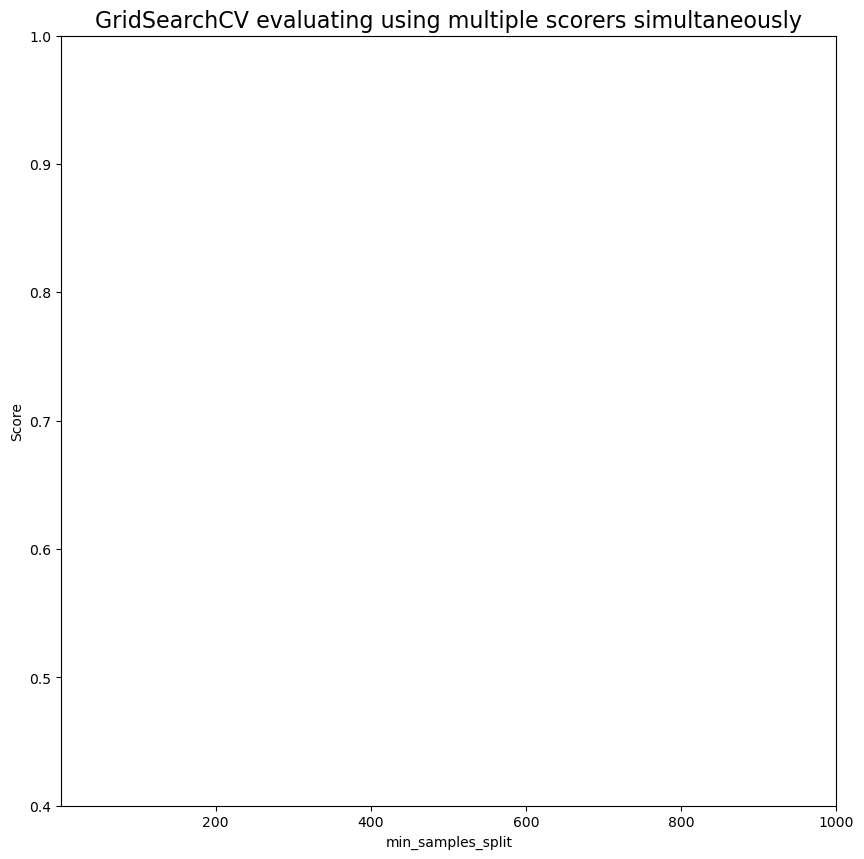

In [56]:
# grid search for hyper-parameters
svm_model_grid(dataset, test_strongset)

In [21]:
# SVM model training
svm_model(dataset, test_strongset, 'rbf', 0.65, 1.5) # 0.65, 1.5

Classification Training Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2025
           1       0.86      0.65      0.74       405

    accuracy                           0.92      2430
   macro avg       0.89      0.81      0.85      2430
weighted avg       0.92      0.92      0.92      2430

Train Confusion Matrix: 
 [[1981   44]
 [ 142  263]] 

Train Accuracy:  0.9234567901234568


Classification Testing Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2220
           1       0.74      0.55      0.63       444

    accuracy                           0.89      2664
   macro avg       0.83      0.76      0.78      2664
weighted avg       0.88      0.89      0.89      2664

Test Confusion Matrix: 
 [[2133   87]
 [ 200  244]] 

Test Accuracy:  0.8922672672672672


In [467]:
# load model for testing
import joblib
model = joblib.load('svm_model_1n2dataset.joblib')
pred_result = model.predict(test_strongset.data)
print('Classification Testing Report: \n', classification_report(testdata['label'], pred_result))
print('Test Confusion Matrix: \n', confusion_matrix(testdata['label'], pred_result), "\n")
print('Test Accuracy: ', accuracy_score(testdata['label'], pred_result))

Classification Testing Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2220
           1       0.75      0.55      0.63       444

    accuracy                           0.89      2664
   macro avg       0.83      0.76      0.79      2664
weighted avg       0.89      0.89      0.89      2664

Test Confusion Matrix: 
 [[2137   83]
 [ 200  244]] 

Test Accuracy:  0.8937687687687688
